In [1]:
import numpy as np
from sklearn.cross_validation import train_test_split
from PIL import Image
import cv2 as cv
import os

class NotFaminist:
    def __init__(self):
        images, labels = [], []

        for i, letter in enumerate(['0', '1']):
            directory = '/Users/yamamotomasaomi/Documents/Github/Python_Study/opencv/notFaminist/%s/' % letter
            files = os.listdir(directory)
            label = np.array([0]*3)
            label[i] = 1
            i = 0
            for file in files:
                try:
                    img = cv.imread(directory+file)
#                     print(img)
                    img = cv.resize(img,(28,28))
                    images.append(img.flatten().astype(np.float32)/255.0)
                except:
                    print ("Skip a corrupted file: " + file)
                    continue
                labels.append(label)
            train_images, test_images, train_labels, test_labels = \
            train_test_split(images, labels, test_size=0.2, random_state=0)
        
        class train:
            def __init__(self):
                self.images = []
                self.labels = []
                self.batch_counter = 0
                
            def next_batch(self, num):
                if self.batch_counter + num >= len(self.labels):
                    batch_images = self.images[self.batch_counter:]
                    batch_labels = self.labels[self.batch_counter:]
                    left = num - len(batch_labels)
                    batch_images.extend(self.images[:left])
                    batch_labels.extend(self.labels[:left])
                    self.batch_counter = left
                else:
                    batch_images = self.images[self.batch_counter:self.batch_counter+num]
                    batch_labels = self.labels[self.batch_counter:self.batch_counter+num]                  
                    self.batch_counter += num
                    
                return (batch_images, batch_labels)
                    
        class test:
            def __init__(self):
                self.images = []
                self.labels = []
                
        self.train = train()
        self.test = test()
                
        self.train.images = train_images
        self.train.labels = train_labels
        self.test.images = test_images
        self.test.labels = test_labels

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
mnist = NotFaminist()

Skip a corrupted file: .DS_Store


In [3]:
#  必要な素材の収集
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import sys, os, pickle
import numpy.random as rd

from scipy.misc import imread

import matplotlib.pyplot as plt

# ランダムシードの作成
# np.random.seed(20160703)
# tf.set_random_seed(20160703)


# その他コンフィグ（いつもの）
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

#画像取り込みデータのオープン
# !ls session_MNIST_Image*

In [4]:
CHANNELS = 3
NUM_CLASSES = 3
IMAGE_SIZE = 28
IMAGE_MATRIX_SIZE = IMAGE_SIZE * IMAGE_SIZE * CHANNELS
num_units = 1024

# プレースホルダーの設定
x = tf.placeholder(tf.float32,[None, IMAGE_MATRIX_SIZE])
w1 = tf.Variable(tf.truncated_normal([IMAGE_MATRIX_SIZE, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w0 = tf.Variable(tf.zeros([num_units,3]))
b0 = tf.Variable(tf.zeros([3]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

In [5]:
t = tf.placeholder(tf.float32, [None, 3])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.arg_max(p, 1), tf.arg_max(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Use `argmax` instead


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()

i=0
time = []
loss_val , acc_val = [], []
loss_vals, acc_vals = [], []

for _ in range (2000):
    i+=1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,feed_dict={x:batch_xs, t: batch_ts})
    loss_vals, acc_vals = sess.run([loss,accuracy],feed_dict={x:batch_xs,t:batch_ts})
    time.append(i)
    loss_val.append(loss_vals)
    acc_val.append(acc_vals)
    
    if i % 500 == 0:
        for c in range(4):
            start = len(mnist.test.images) // 4 * c
            end = len(mnist.test.images) // 4 * (c+1)
            loss_vals, acc_vals = sess.run([loss,accuracy],feed_dict={x:mnist.test.images[start:end],t:mnist.test.labels[start:end]})
#             time.append(i)
#             loss_val.append(loss_vals)
#             acc_val.append(acc_vals)
        loss_val_sum = np.sum(loss_vals)
        acc_val_sum = np.mean(acc_vals)
        print('Step: %d, Loss:%f, Accuracy: %f' 
                % (i, loss_val_sum, acc_val_sum))
saver.save(sess, '/Users/yamamotomasaomi/Documents/GitHub/Python_Study/opencv/learn_result', global_step=i)

In [7]:
saver.restore(sess,'/Users/yamamotomasaomi/Documents/GitHub/Python_Study/opencv/learn_result-2000')

INFO:tensorflow:Restoring parameters from /Users/yamamotomasaomi/Documents/GitHub/Python_Study/opencv/learn_result-2000


/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


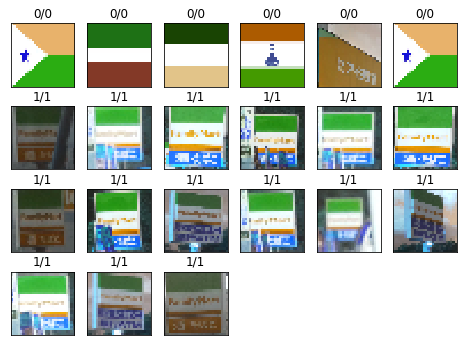

In [8]:
batch_xs, batch_ts = mnist.train.next_batch(50) 
p_val = sess.run(p, feed_dict={x:batch_xs, t:batch_ts})
fig = plt.figure(figsize = (8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(mnist.train.images, mnist.train.labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 16  and i == actual) or (c >= 4 and i != actual):
# 不正解画像の表示
#         if prediction != actual:
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d/%d' % (prediction,actual))
            subplot.imshow(image.reshape(28,28,3), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
        if c > 24:
            break

# 確認表示
print("image:shape=%s"%(np.shape(time)))
# i = 0
# for i in range(len(batch_xs)):
#     print(batch_xs[i])
#     print('\t')
print("label:shape=%s"%(np.shape(acc_val)))
# print(batch_ts)

NameError: name 'time' is not defined

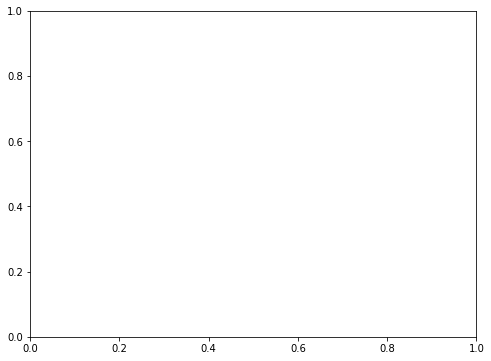

In [9]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(time,loss_val,linewidth=2)
fig2 = plt.figure(figsize=(8,6))
subplot2 = fig2.add_subplot(1,1,1)
subplot2.plot(time,acc_val)

In [ ]:
# from IPython.display import display
# import fileupload

# uploader = fileupload.FileUploadWidget()

# def _handle_upload(change):
#     w = change['owner']
#     with open(w.filename, 'wb') as f:
#         f.write(w.data)
#     print('Uploaded `{}` ({:.2f} kB)'.format(
#         w.filename, len(w.data) / 2**10))

# uploader.observe(_handle_upload, names='data')

# display(uploader)

In [10]:
if __name__ == '__main__':
    # 定数定義
    ESC_KEY = 27     # Escキー
    INTERVAL= 33     # 待ち時間
    FRAME_RATE = 30  # fps

    ORG_WINDOW_NAME = "org"
    GAUSSIAN_WINDOW_NAME = "gaussian"

    DEVICE_ID = 0

    # 分類器の指定
    cascade_file = "cascade.xml"
    cascade = cv.CascadeClassifier(cascade_file)

    # カメラ映像取得
    cap = cv.VideoCapture(DEVICE_ID)

    # 初期フレームの読込
    end_flag, c_frame = cap.read()
    height, width, channels = c_frame.shape

    # ウィンドウの準備
    cv.namedWindow(ORG_WINDOW_NAME)
    cv.namedWindow(GAUSSIAN_WINDOW_NAME)

    # 変換処理ループ
    while end_flag == True:

        # 画像の取得と顔の検出
        img = c_frame
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        face_list = cascade.detectMultiScale(img_gray, minSize=(100, 100))

        # 検出した顔に印を付ける
        for (x, y, w, h) in face_list:
            color = (0, 0, 225)
            pen_w = 3
            cv.rectangle(img_gray, (x, y), (x+w, y+h), color, thickness = pen_w)

        # フレーム表示
        cv.imshow(ORG_WINDOW_NAME, c_frame)
        cv.imshow(GAUSSIAN_WINDOW_NAME, img_gray)

        # Escキーで終了
        key = cv.waitKey(INTERVAL)
        if key == ESC_KEY:
            break

        # 次のフレーム読み込み
        end_flag, c_frame = cap.read()

    # 終了処理
    cv.destroyAllWindows()
    cap.release()